# Ford GoBike System Data
## by Thu Pham

## Preliminary Wrangling

> Bay Area Motivate, LLC operates the Bay Wheels bicycle sharing service. Motivate is commited to support bicycling as an alternative transportation option. The Bay Wheels system data is made availabel to the public by Motivate and contains information of each trip such as trip duration, start time and date, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data and explore the first 5 rows of the table
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
# Print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [4]:
# Convert start_time and end_time to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB


In [5]:
# Usefull statistics for the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


## Univariate Exploration

## Distribution of User Type

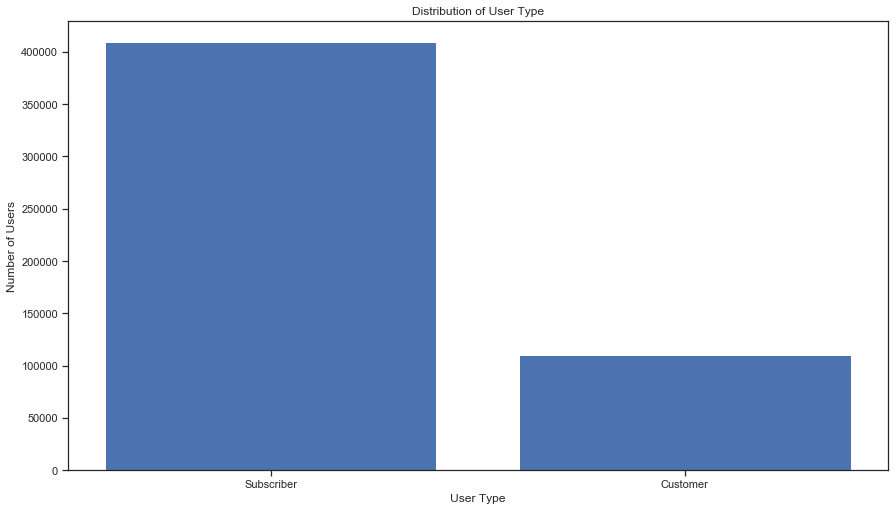

In [18]:
# Create bar plot for user type distribution
plt.figure(figsize=[14.70, 8.27])
plt.bar(x = df['user_type'].value_counts().keys(), height = df['user_type'].value_counts())
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Distribution of User Type');

The number of subscribers is much higher than that of customers.

## Distribution of Trip Duration

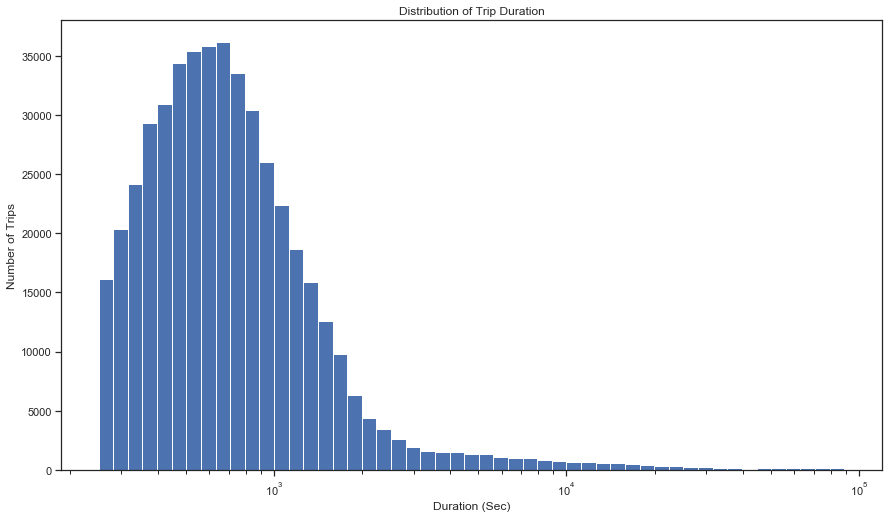

In [16]:
# Create histogram for trip duration distribution
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Trips')
plt.xscale('log');

The distribution of trip duration is skewed to the right. Most of the values are less than 1,000 seconds with the the highest value of around 600 seconds.

## Distribution of Age

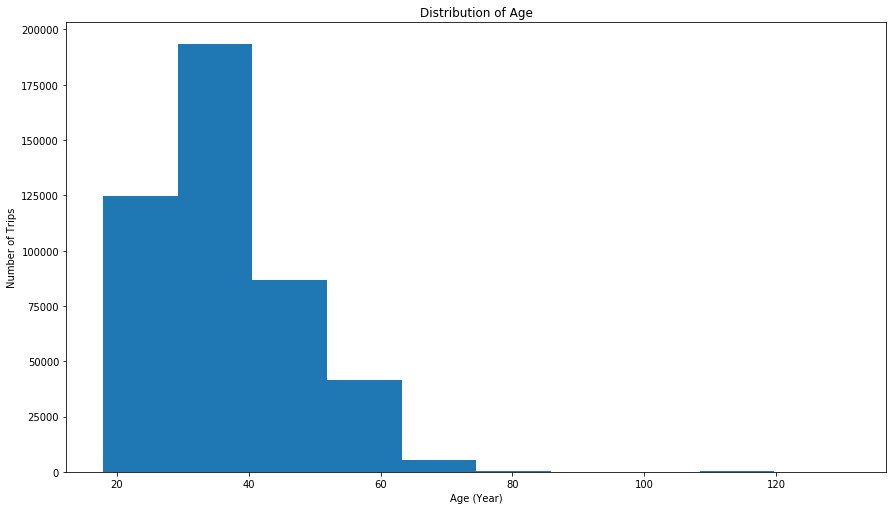

In [8]:
# Create histogram for age distribution
plt.figure(figsize=[14.70, 8.27])
plt.hist(2017 - df['member_birth_year'])
plt.xlabel('Age (Year)')
plt.title("Distribution of Age")
plt.ylabel('Number of Trips');

The distribution is skewed to the right and is concentrated between 20 to 40 years old.

## Distribution of Gender

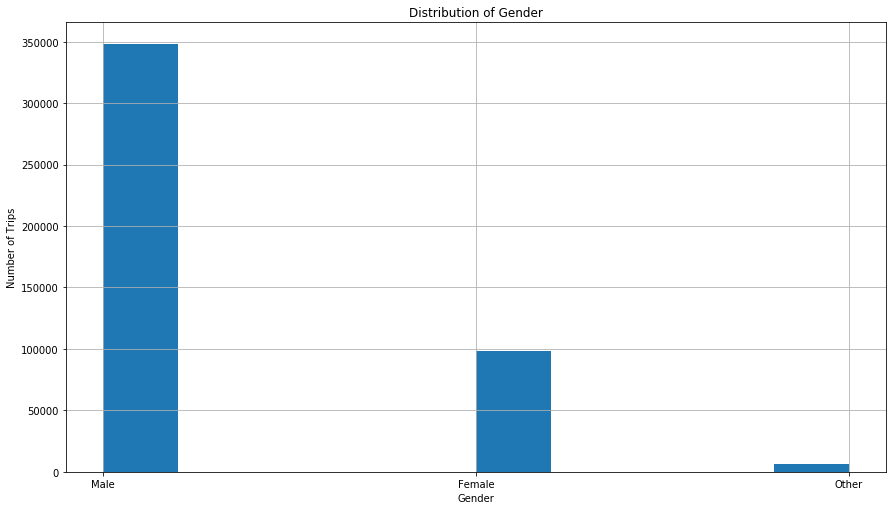

In [9]:
# Create historgram for gender distribution
plt.figure(figsize=[14.70, 8.27])
df['member_gender'].hist()
plt.xlabel('Gender')
plt.title("Distribution of Gender")
plt.ylabel('Number of Trips');

The number of male members is more than that of female members.

## Bivariate Exploration

## The Relationship between Trip Duration and User Type

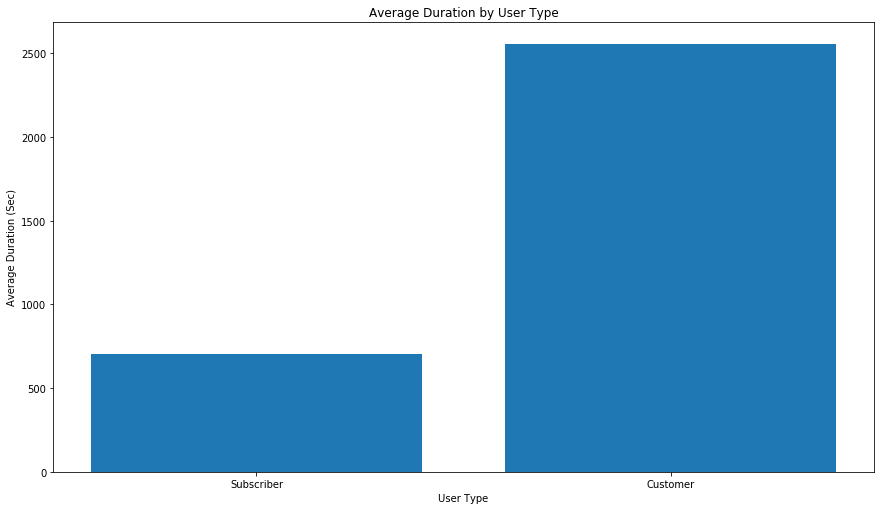

In [10]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Divide dataset into 2 user-type groups
subscriber = df[df['user_type'] == 'Subscriber']
customer = df[df['user_type'] == 'Customer']

# Calculate the mean trip duration for both groups
subscriber_duration = subscriber['duration_sec'].mean()
customer_duration = customer['duration_sec'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [subscriber_duration, customer_duration]
labels = ['Subscriber', 'Customer']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (Sec)');

The average trip duration of customers is higher than that of subscribers.

## The Relationship between Trip Duration and Age

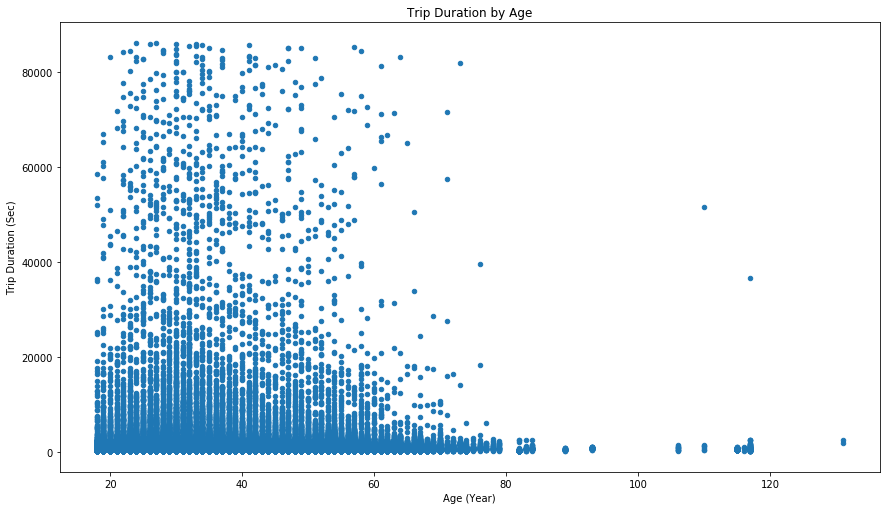

In [11]:
# Create scatter plot for trip duration and age
df['age'] = 2017 - df['member_birth_year']
df.plot(x='age', y='duration_sec', kind='scatter', figsize=[14.70, 8.27])
plt.title('Trip Duration by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Trip Duration (Sec)');

There does not seem to be correlation between age and trip duration.

## The Relationship between Trip Duration and Gender

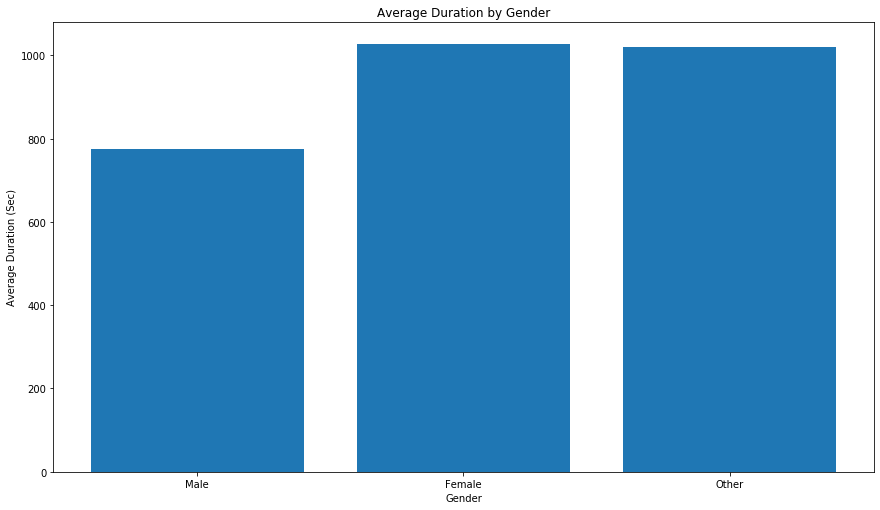

In [12]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Divide dataset into 2 gender groups
male = df[df['member_gender'] == 'Male']
female = df[df['member_gender'] == 'Female']
other = df[df['member_gender'] == 'Other']

# Calculate the mean trip duration for both groups
male_duration = male['duration_sec'].mean()
female_duration = female['duration_sec'].mean()
other_duration = other['duration_sec'].mean()

# Create a bar chart with proper labels
locations = [1, 2, 3]
heights = [male_duration, female_duration, other_duration]
labels = ['Male', 'Female', 'Other']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (Sec)');

The average trip durations for female and other members are higher than that of male members.

## Multivariate Exploration

### The Relationship among Trip Duration, Age, and Gender

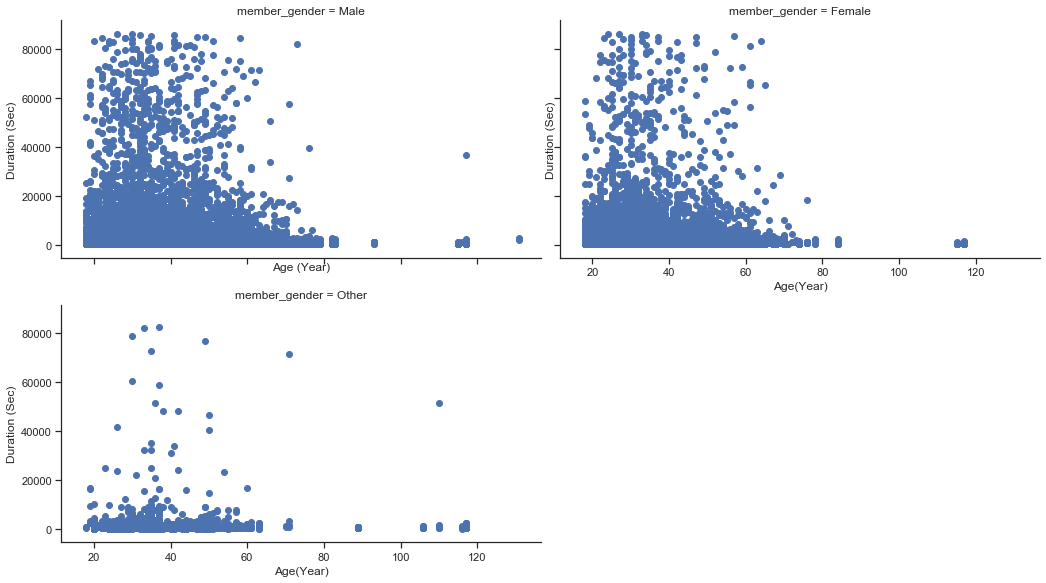

In [13]:
# Create scatter plots for trip duration, age, and gender
sb.set(style='ticks', color_codes=True)
genders = sb.FacetGrid(data=df, col='member_gender', col_wrap=2, height=8.27/2, aspect = (14.70/2)/(8.27/2))
genders.map(plt.scatter, 'age', 'duration_sec')

# Set xlabels
genders.axes[0].set_xlabel('Age (Year)')
genders.axes[1].set_xlabel('Age(Year)')
genders.axes[2].set_xlabel('Age(Year)')

# Set ylabels
genders.axes[0].set_ylabel('Duration (Sec)')
genders.axes[1].set_ylabel('Duration (Sec)')
genders.axes[2].set_ylabel('Duration (Sec)');

We can see that for all gender groups there are similar trends for age and trip durations.

### The Relationship among User Type, Gender, and Trip Duration

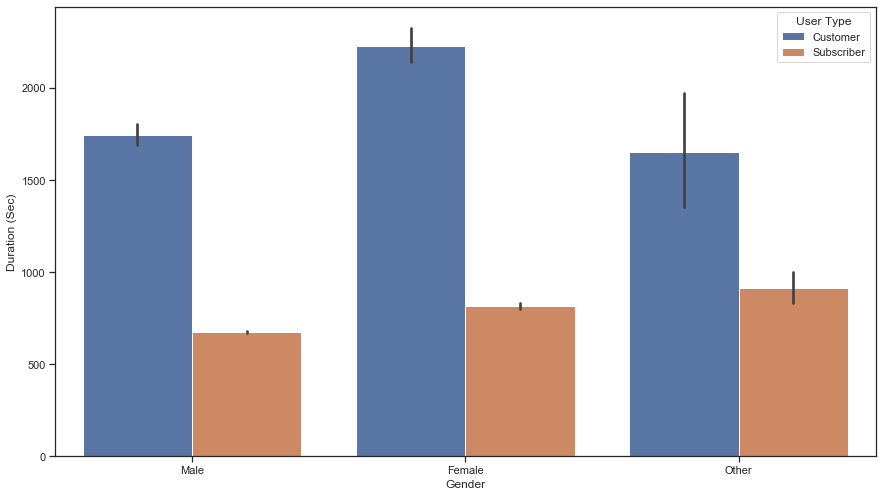

In [14]:
# Create bar plots for user type, gender, and trip duration
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=df, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Duration (Sec)')
plt.legend(title='User Type');

We can see that for all gender groups, the customers have longer trip duration than the subscribers.

### The Relationship among Trip Duration, Age, and User Type

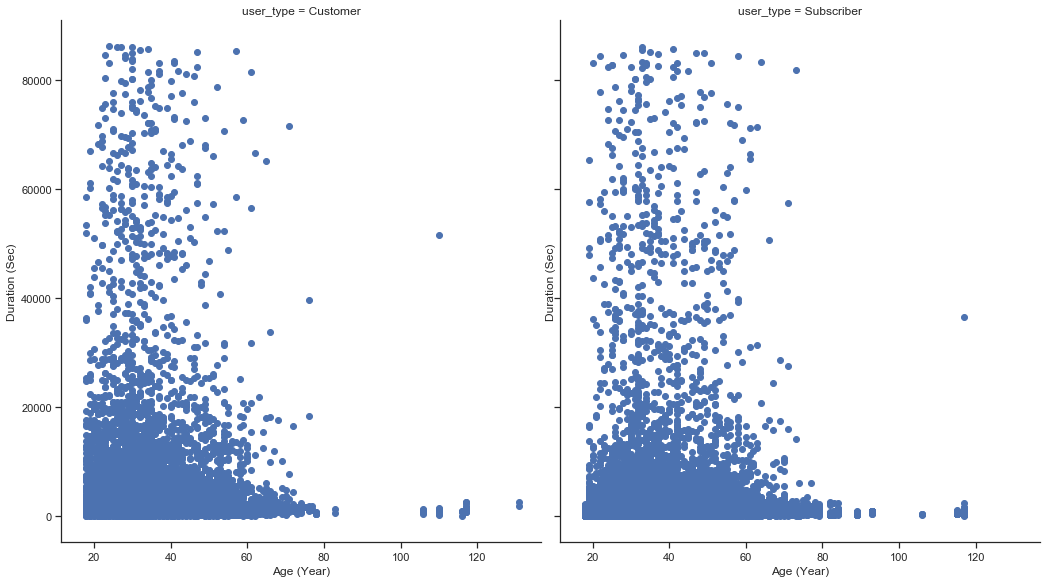

In [15]:
# Create scatter plots for trip duration, age, and user type
user_types = sb.FacetGrid(data=df, col='user_type', col_wrap=2, height=8.27, aspect = (14.70/2)/8.27)
user_types.map(plt.scatter, 'age', 'duration_sec')

# Set xlabels
user_types.axes[0].set_xlabel('Age (Year)')
user_types.axes[1].set_xlabel('Age (Year)')

# Set ylabels
user_types.axes[0].set_ylabel('Duration (Sec)')
user_types.axes[1].set_ylabel('Duration (Sec)');

We can see that for both user type groups there are similar trends for age and trip duration.